In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import random

import math
from math import exp
from math import factorial as fact

In [4]:
import warnings
warnings.filterwarnings("ignore")

## QUESTION 1

In [5]:
def nCr(n, r):
     return (fact(n) / (fact(r) * fact(n - r)))


    #probability of perfect reconstruction without hamming code
p= nCr(4,1)*((0.1)**1)*((0.9)**3)  + nCr(4,2)*((0.1)**2)*((0.9)**2)  + nCr(4,3)*((0.1)**3)*((0.9)**1)  +  nCr(4,4)*((0.1)**4)*((0.9)**0)
print(1-p)



    #probability of perfect reconstruction with hamming code
p_h=nCr(7,2)*((0.1)**2)*(0.9)**5+nCr(7,3)*((0.1)**3)*(0.9)**4+nCr(7,4)*((0.1)**4)*(0.9)**3+nCr(7,5)*((0.1)**5)*(0.9)**2+nCr(7,6)*((0.1)**6)*(0.9)**1+nCr(7,7)*((0.1)**7)*(0.9)**0
print(1-p_h)


probability_of_reliability = (( 1 - p_h )-( 1 - p )) / (1 - p_h )
print(probability_of_reliability)

0.6560999999999999
0.8503056
0.22839506172839516


<BarContainer object of 2 artists>

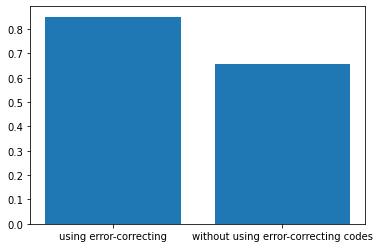

In [24]:
data = {'using error-correcting':(1-p_h), 'without using error-correcting codes':(1-p) }
names = list(data.keys())
values = list(data.values())
plt.bar(names, values)

## QUESTION 2

100

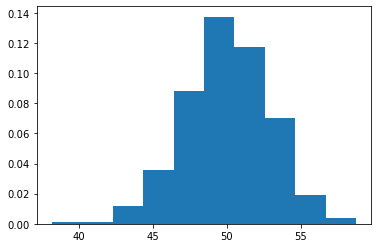

In [3]:
def x(n):
    x=[]
    for i in range(n):
        x.append(np.random.uniform(0,1))
    return x

def y(m):
    y=[]
    for i in range(m):
        y.append(sum(x(100)))
    return y

plt.hist(y(1000),density=True)

len(x(100))

## QUESTION 3

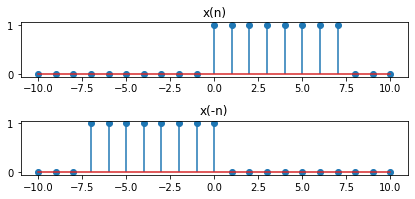

In [34]:
def x(n):
    x=[]
    for i in n:
        if(i>=0 and i<=7):
            x.append(1)
        else:
            x.append(0)
    return x

n=np.arange(-10,11,1)


plt.subplot(3,1,1)
plt.stem(n,x(n))
plt.title('x(n)')


plt.subplot(3,1,2)
plt.stem(n,x(-n))
plt.title('x(-n)')

plt.tight_layout()

In [35]:
def convolution(inputseq,impulseresponse):
        lengthA=np.size(inputseq)
        lengthB=np.size(impulseresponse)
        C = np.zeros(lengthA + lengthB -1)
        for m in np.arange(lengthA):
            for n in np.arange(lengthB):
                C[m+n] = C[m+n] + inputseq[m]*impulseresponse[n]
        return C 

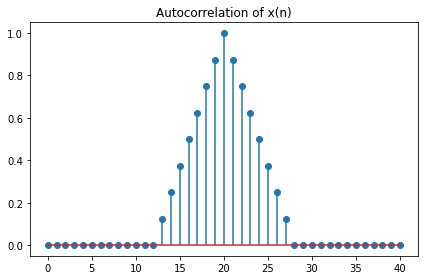

In [36]:
r=(convolution(x(n),x(-n)))
##convolution of x(n) with x(-n) gives the auto correlation of x(n).


plt.stem(r/8)

plt.title('Autocorrelation of x(n)')


plt.tight_layout()

plt.show()

## QUESTION 4

### PART 1

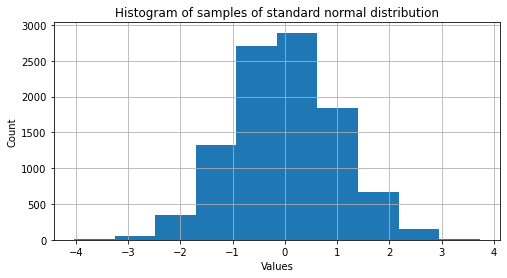

In [56]:
N = 10000
x = np.random.randn(N) # N samples from standard normal distribution


plt.figure(figsize=(8,4))
plt.hist(x)
plt.title("Histogram of samples of standard normal distribution")
plt.xlabel("Values")
plt.ylabel("Count")
plt.grid()

### PART2

In [57]:
def auto_corr(x):
    N = len(x)
    r = np.zeros(N)
    for k in range(N):
        for i in range(N):
            if(i-k<0):
                r[k] += 0
            else:
                
                r[k] += (x[i]*x[i-k])/N
    return r

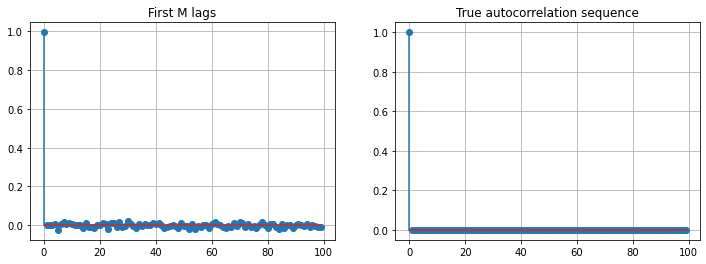

In [58]:
 # First M lags of autocorrelation

M = 100
r = auto_corr(x)[0:M]
true_autocorr = [1] + [0 for i in range(M-1)] #similar to impulse
n = [i for i in range(M)]

fig,axes = plt.subplots(1,2,figsize=(12,4))
axes[0].stem(n,r)
axes[0].set_title("First M lags")
axes[0].grid()

axes[1].stem(n,true_autocorr)
axes[1].set_title("True autocorrelation sequence")
axes[1].grid()

### PART3

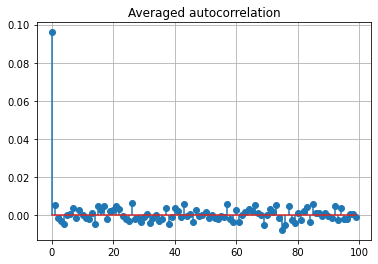

In [28]:
def averaged_auto_corr(x,M=100):
    N = len(x)
    r = np.zeros(M)
    for k in range(M):
        for m in range(10):                 # 10 different samples
            for n in range(M):
                if(n-k+100*m<0):
                    r[k] += 0
                else:
                    r[k] += (x[n+100*m]*x[n-k+100*m])/N
    return r
    
x = np.random.randn(N)
M = 100
r_avg = averaged_auto_corr(x)
true_autocorr = [1] + [0 for i in range(M-1)]
n = [i for i in range(M)]

plt.stem(n,r_avg)
plt.title("Averaged autocorrelation")
plt.grid()

### PART4

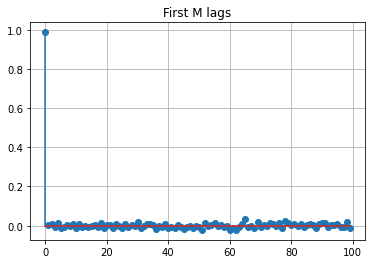

In [23]:
N = 10000
x = np.random.randn(N) # N samples from standard normal distribution

M = 100
r = autocorr(x)[0:M] # First M lags of autocorrelation
n = [i for i in range(M)]

plt.stem(n,r)
plt.title("First M lags")
plt.grid()

while comparing first M lags of autocorrelation between part(b) and part(d),we can say that in (d) as number of samples are more compared to number of samples in (b),autocorrelation is much closer to true autocorrelation.

## QUESTION 5

In [13]:
df=pd.read_csv("wheat_seeds.csv")
df.head()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [59]:
with open("wheat_seeds.csv") as file_name:
    array = np.loadtxt(file_name, delimiter=",",skiprows=1,usecols=(0,1,2,3,4,5,6))

#print(array)

In [60]:
feature1=array[:,0]
feature2=array[:,1]
feature3=array[:,2]
feature4=array[:,3]
feature5=array[:,4]
feature6=array[:,5]
feature7=array[:,6]


In [22]:
mean=np.mean(array,axis=0)
mean

array([14.91874372, 14.59582915,  0.87081055,  5.64315075,  3.26553266,
        3.69921709,  5.42065327])

### for COVARIANCE

In [29]:


C=[]
for i in range(7):
    for j in range(7):
        
        C.append((np.dot(array[:,i]-mean[i],array[:,j]-mean[j]))/198) #no of entries =199

df_C= pd.DataFrame(np.array(C).reshape(7,7),
                   index=['Area','Perimeter','Compactness','Kernel.Length','Kernel.Width','Asymmetry.Coeff','Kernel.Groove'],
                   columns=['Area','Perimeter','Compactness','Kernel.Length','Kernel.Width','Asymmetry.Coeff','Kernel.Groove'])


cov_mat=np.stack((feature1,feature2,feature3,feature4,feature5,feature6,feature7),axis=0)

df_C


,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove
Area,8.526259,3.805181,0.041530,1.231976,1.072631,-0.957144,1.241226
Perimeter,3.805181,1.717265,0.016253,0.565577,0.468748,-0.406831,0.574360
Compactness,0.041530,0.016253,0.000544,0.003869,0.006724,-0.011300,0.002608
Kernel.Length,1.231976,0.565577,0.003869,0.196775,0.144776,-0.110744,0.203731
Kernel.Width,1.072631,0.468748,0.006724,0.144776,0.143127,-0.140875,0.139474
Asymmetry.Coeff,-0.957144,-0.406831,-0.011300,-0.110744,-0.140875,2.164142,-0.002428
Kernel.Groove,1.241226,0.574360,0.002608,0.203731,0.139474,-0.002428,0.242771


In [31]:
c=np.cov(cov_mat)
df_c= pd.DataFrame(c,
                 index=['Area','Perimeter','Compactness','Kernel.Length','Kernel.Width','Asymmetry.Coeff','Kernel.Groove'],
                 columns=['Area','Perimeter','Compactness','Kernel.Length','Kernel.Width','Asymmetry.Coeff','Kernel.Groove'])
df_c

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove
Area,8.526259,3.805181,0.041530,1.231976,1.072631,-0.957144,1.241226
Perimeter,3.805181,1.717265,0.016253,0.565577,0.468748,-0.406831,0.574360
Compactness,0.041530,0.016253,0.000544,0.003869,0.006724,-0.011300,0.002608
Kernel.Length,1.231976,0.565577,0.003869,0.196775,0.144776,-0.110744,0.203731
Kernel.Width,1.072631,0.468748,0.006724,0.144776,0.143127,-0.140875,0.139474
Asymmetry.Coeff,-0.957144,-0.406831,-0.011300,-0.110744,-0.140875,2.164142,-0.002428
Kernel.Groove,1.241226,0.574360,0.002608,0.203731,0.139474,-0.002428,0.242771


#### hence both are same

### for CORRELATION

In [36]:
r=[]
for i in range(7):
    for j in range(7):
        
        r.append((np.dot(array[:,i]-mean[i],array[:,j]-mean[j]))/(math.sqrt(sum(np.square(array[:,i]-mean[i])))*(math.sqrt(sum(np.square(array[:,j]-mean[j]))))))

        
df_r= pd.DataFrame(np.reshape(r,(7,7)),
                 index=['Area','Perimeter','Compactness','Kernel.Length','Kernel.Width','Asymmetry.Coeff','Kernel.Groove'],
                 columns=['Area','Perimeter','Compactness','Kernel.Length','Kernel.Width','Asymmetry.Coeff','Kernel.Groove'])
df_r

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove
Area,1.000000,0.994437,0.609887,0.951126,0.970980,-0.222820,0.862727
Perimeter,0.994437,1.000000,0.531841,0.972944,0.945496,-0.211034,0.889543
Compactness,0.609887,0.531841,1.000000,0.374011,0.762167,-0.329400,0.227016
Kernel.Length,0.951126,0.972944,0.374011,1.000000,0.862680,-0.169704,0.932124
Kernel.Width,0.970980,0.945496,0.762167,0.862680,1.000000,-0.253122,0.748228
Asymmetry.Coeff,-0.222820,-0.211034,-0.329400,-0.169704,-0.253122,1.000000,-0.003349
Kernel.Groove,0.862727,0.889543,0.227016,0.932124,0.748228,-0.003349,1.000000


In [37]:
df.corr()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
Area,1.000000,0.994437,0.609887,0.951126,0.970980,-0.222820,0.862727,-0.340664
Perimeter,0.994437,1.000000,0.531841,0.972944,0.945496,-0.211034,0.889543,-0.322223
Compactness,0.609887,0.531841,1.000000,0.374011,0.762167,-0.329400,0.227016,-0.539261
Kernel.Length,0.951126,0.972944,0.374011,1.000000,0.862680,-0.169704,0.932124,-0.249422
Kernel.Width,0.970980,0.945496,0.762167,0.862680,1.000000,-0.253122,0.748228,-0.421961
Asymmetry.Coeff,-0.222820,-0.211034,-0.329400,-0.169704,-0.253122,1.000000,-0.003349,0.573956
Kernel.Groove,0.862727,0.889543,0.227016,0.932124,0.748228,-0.003349,1.000000,0.035508
Type,-0.340664,-0.322223,-0.539261,-0.249422,-0.421961,0.573956,0.035508,1.000000


#### both of them are same

## QUESTION 6

### PART 1

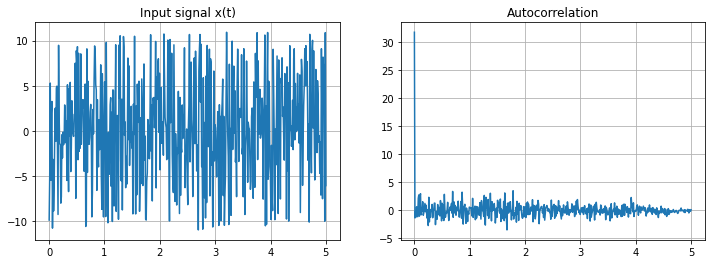

In [27]:
def x_t(t,phi1,phi2):
    return 5*np.sin(2*t+phi1) + 6*np.sin(3*t+phi2)

def autocorr(x):
    N = len(x)
    r = np.zeros(N)
    for k in range(N):
        for i in range(N):
            if(i-k<0):
                r[k] += 0
            else:
                r[k] += (x[i]*x[i-k])/N
    return r

phi1 = np.linspace(-np.pi,np.pi)
phi2 = np.linspace(0,2*np.pi)
t = np.linspace(0,5,500)
x = [x_t(i,random.choice(phi1),random.choice(phi2)) for i in t]
#x = [x_t(i,-np.pi/2,np.pi/2) for i in t]
r = autocorr(x)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].plot(t,x)
axes[0].set_title("Input signal x(t)")
axes[0].grid()

axes[1].plot(t,r)
axes[1].set_title("Autocorrelation")
axes[1].grid()

### PART2

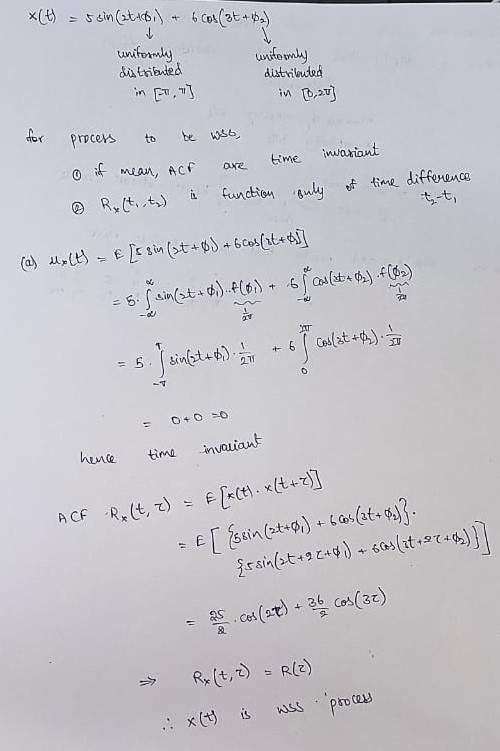

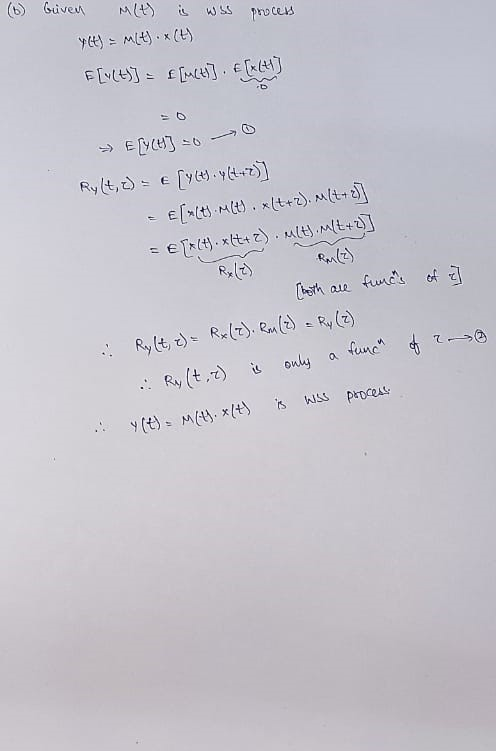

## QUESTION 7

### PART1

In [53]:
chi_squ=np.random.chisquare(df=2,size=(2,3))
chi_squ

array([[0.34433354, 0.42383283, 0.10876255],
       [1.53260263, 5.09790179, 0.8845816 ]])

### PART2

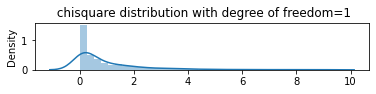

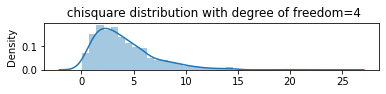

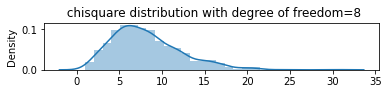

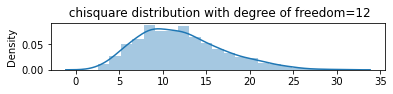

In [100]:
df=[1,4,8,12]  #DEGREES OF FREEDOM
for i in df:
    chi=np.random.chisquare(i,1000)
    j=1
    plt.subplot(4,1,j)
    txt = " chisquare distribution with degree of freedom={num}".format(num=i)
    plt.title(txt)
    sns.distplot(chi, hist=True)
    j+=1
    plt.show()

## QUESTION 8

### PART 1

In [43]:
np.random.exponential(scale=2, size=(2,3))

array([[0.17078442, 2.8175767 , 0.45466672],
       [5.9326215 , 1.1759661 , 0.03388208]])

### PART 2

In [49]:
import seaborn as sns

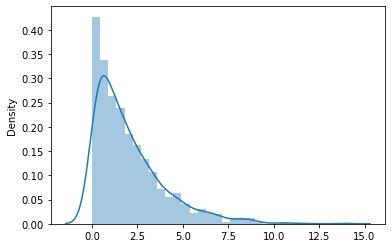

In [101]:
sns.distplot(np.random.exponential(scale=2.0,size=1000), hist=True)

plt.show()


## QUESTION 9

### PART1

In [40]:
x=np.random.choice(a=[2,4,6,8],size=100,p=[0.1,0.3,0.6,0])
x

array([6, 4, 6, 6, 4, 4, 4, 6, 4, 6, 4, 2, 6, 4, 4, 6, 6, 4, 6, 4, 6, 4,
       6, 4, 6, 6, 6, 6, 6, 6, 4, 6, 4, 6, 6, 6, 6, 6, 6, 4, 6, 6, 6, 6,
       2, 6, 6, 4, 6, 6, 6, 6, 4, 6, 6, 4, 6, 6, 4, 4, 4, 2, 6, 6, 6, 2,
       4, 6, 4, 4, 2, 4, 6, 4, 6, 2, 4, 4, 6, 6, 6, 6, 6, 6, 6, 4, 6, 4,
       2, 6, 4, 4, 4, 6, 6, 6, 6, 2, 4, 4])

### PART2

In [42]:
y=np.random.choice(a=[2,4,6,8],size=(3,5),replace=True,p=[0.1,0.3,0.6,0])
y

array([[6, 6, 4, 6, 6],
       [6, 6, 2, 4, 4],
       [6, 6, 2, 6, 6]])

## QUESTION 10

### PART1

In [18]:
#pdf function for central chi-squared
def centralchi(n):
    res = []
    #x = np.linspace(0.01,10,1000)
    for i in x:
        num = (i**(n/2-1)) * np.exp(-i/2)
        den = (2**(n/2)) * np.math.gamma(n/2)
        res.append(num/den)
    return res



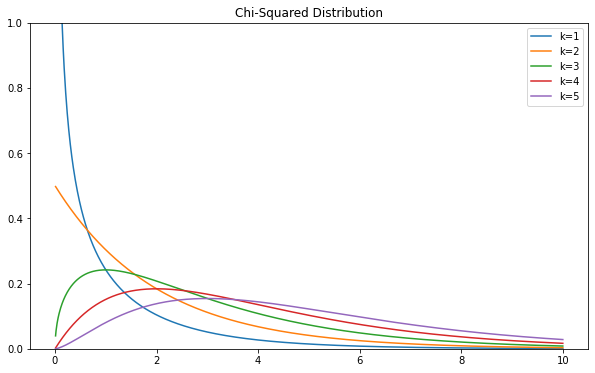

In [19]:
#plotting central chi-squared
x=np.linspace(0.01,10,1000)
plt.figure(figsize=(10,6))
plt.plot(x, centralchi(1), label='k=1')
plt.plot(x, centralchi(2), label='k=2')
plt.plot(x, centralchi(3), label='k=3')
plt.plot(x, centralchi(4), label='k=4')
plt.plot(x, centralchi(5), label='k=5')
plt.title('Chi-Squared Distribution')
plt.ylim(0,1)
plt.legend()
plt.show()


### PART2

In [22]:
#pdf function for non-central chi-squared
def noncentralchi(n,l):
    res = 0
    
    for k in range(0,100):
        var1 = np.array(centralchi(n+2*k))
        var2 = np.exp(-l/2) * np.power(l/2,k) / np.math.factorial(k)
        res = res + var1*var2
    
    return res
 


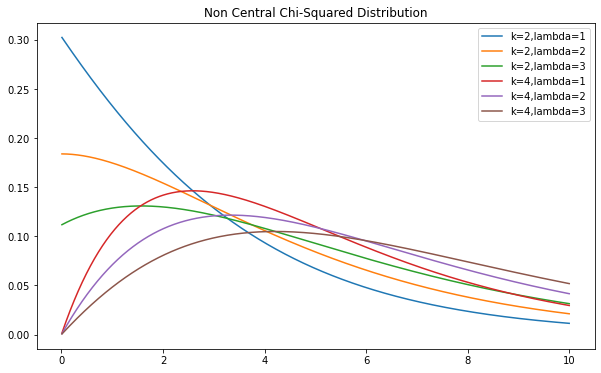

In [23]:
#plotting non-central chi-squared
plt.figure(figsize=(10,6))
plt.plot(x,  noncentralchi(2,1),  label='k=2,lambda=1')
plt.plot(x,  noncentralchi(2,2),  label='k=2,lambda=2')
plt.plot(x,  noncentralchi(2,3),  label='k=2,lambda=3')
plt.plot(x,  noncentralchi(4,1),  label='k=4,lambda=1')
plt.plot(x,  noncentralchi(4,2),  label='k=4,lambda=2')
plt.plot(x,  noncentralchi(4,3),  label='k=4,lambda=3')
plt.title('Non Central Chi-Squared Distribution')
plt.legend()
plt.show()
